In [6]:
!pip install textblob

In [13]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df = pd.read_csv('SMA 1-3 Dataset.csv')
df.head(5)

,Post_ID,Post_Date,Content_Type,Content,Hashtags,Location,Likes,Comments,Shares,Followers,Mentioned_Entities
0,1,01-04-2025,Text,"""Loving the weather today!""",#weather #sunny,New York,120,10,5,1500,@user123
1,2,02-04-2025,Image,"""Check out this amazing sunset!""",#sunset #beautiful,Los Angeles,230,20,10,2000,@sunlover
2,3,02-04-2025,Video,"""How to make a perfect coffee""",#coffee #tutorial,Chicago,150,30,15,1800,@coffeeaddict
3,4,03-04-2025,Text,"""Just finished a 5K run!""",#fitness #running,New York,180,40,20,1700,@runwithme
4,5,03-04-2025,Image,"""Delicious homemade pizza!""",#foodie #pizza,Miami,300,50,30,2200,@foodiegram


In [29]:
def get_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

df['polarity'] = df['Content'].apply(get_sentiment)
#df['polarity']

In [31]:
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(classify_sentiment)
#df['sentiment']

C:\Users\karke\AppData\Local\Temp\ipykernel_18052\3997243468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", hue=None, palette="coolwarm", legend=False)


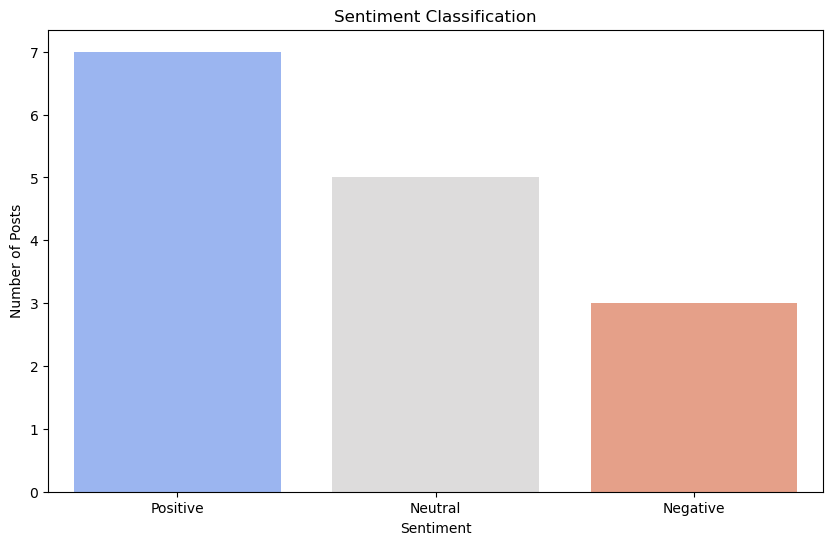

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="sentiment", hue=None, palette="coolwarm", legend=False)
plt.title('Sentiment Classification')
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.show()

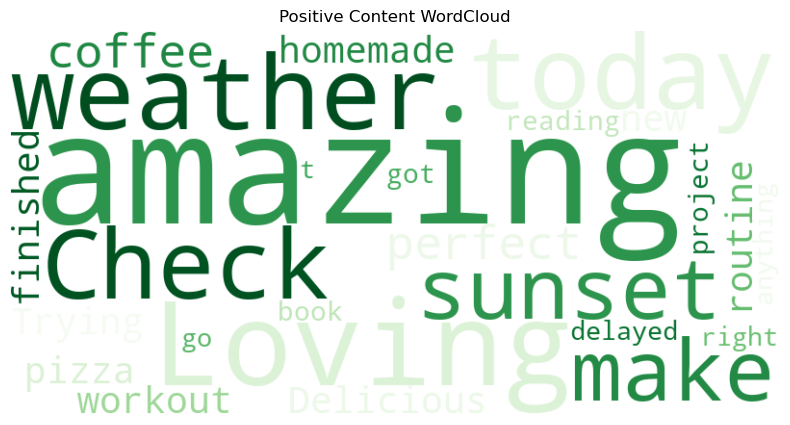

In [35]:
plus = ' '.join(df[df['sentiment'] == 'Positive']['Content'].dropna().astype(str))

wordcloud_pos = WordCloud(
    width = 800, height = 400, background_color = 'white', colormap="Greens"
    ).generate(plus)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Content WordCloud")
plt.show()

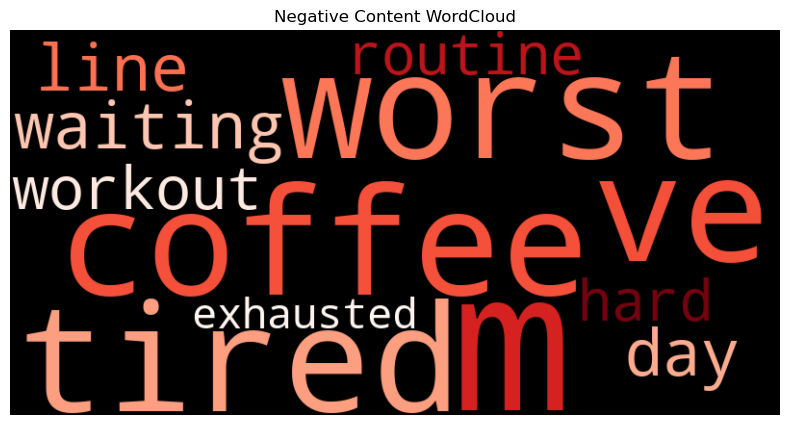

In [37]:
minus = ' '.join(df[df['sentiment'] == 'Negative']['Content'].dropna().astype(str))

wordcloud_neg = WordCloud(
    width=800, height=400, background_color="black", colormap="Reds"
).generate(minus)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Content WordCloud")
plt.show()